In [3]:
# Import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Read the Dataset
df = pd.read_csv("osteoporosis.csv")

In [5]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [6]:
#Checking the Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

#### find the null values in Dataset

In [7]:
#Checking THE null value of Dataset
df.isnull().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [8]:
#Checking the shape of Dataset
df.shape

(1958, 16)

In [9]:
#Treat the Null value
df['Medical Conditions']=df['Medical Conditions'].fillna(df['Medical Conditions'].mode()[0])

In [10]:
df['Alcohol Consumption']=df['Alcohol Consumption'].fillna(df['Alcohol Consumption'].mode()[0])

In [11]:
df['Medications']=df['Medications'].fillna(df['Medications'].mode()[0])

In [12]:
df.isnull().sum()

Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

In [13]:
#Checking the statistical Analysis
df.describe()

,Id,Age,Osteoporosis
count,1.958000e+03,1958.000000,1958.000000
mean,1.549929e+06,39.101124,0.500000
std,2.614250e+05,21.355424,0.500128
min,1.100064e+06,18.000000,0.000000
25%,1.319163e+06,21.000000,0.000000
50%,1.546028e+06,32.000000,0.500000
75%,1.775870e+06,53.000000,1.000000
max,1.999676e+06,90.000000,1.000000


In [14]:
df["Alcohol Consumption"].value_counts()

Alcohol Consumption
Moderate    1958
Name: count, dtype: int64

In [15]:
df["Medical Conditions"].value_counts()

Medical Conditions
Hyperthyroidism         1325
Rheumatoid Arthritis     633
Name: count, dtype: int64

In [16]:
df["Medications"].value_counts()

Medications
Corticosteroids    1958
Name: count, dtype: int64

#### EDA (Exploratory Data Analysis) On Dataset

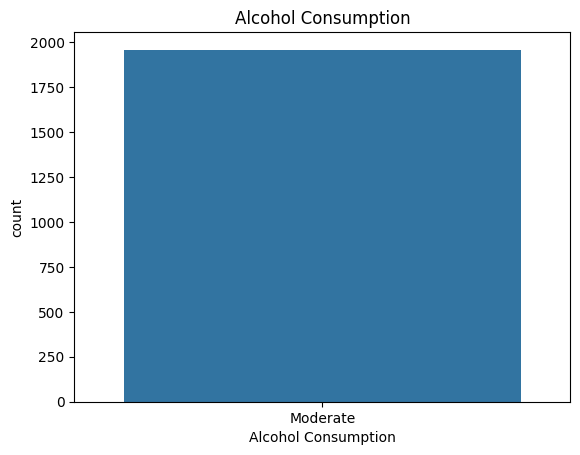

In [17]:
plt.title("Alcohol Consumption")
sns.countplot(df,x="Alcohol Consumption",hue="Alcohol Consumption")
plt.show()

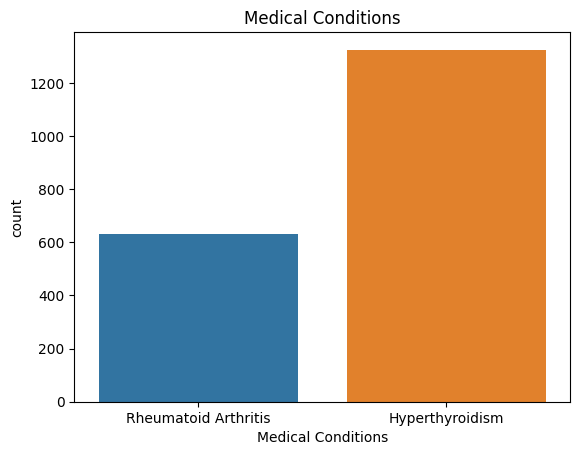

In [18]:
plt.title("Medical Conditions")
sns.countplot(df,x="Medical Conditions",hue="Medical Conditions")
plt.show()

### Drop Unnessary Column

In [19]:
new_df=df.drop("Id",axis=1,inplace=True)

In [20]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,Moderate,Hyperthyroidism,Corticosteroids,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1


In [21]:
new_df=df.drop("Alcohol Consumption",axis=1,inplace=True)

In [22]:
new_df=df.drop("Medications",axis=1,inplace=True)

In [23]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Medical Conditions,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Rheumatoid Arthritis,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,Hyperthyroidism,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Hyperthyroidism,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,Rheumatoid Arthritis,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,Rheumatoid Arthritis,Yes,1


In [24]:
df["Age"].value_counts()

Age
18    152
19    147
34    121
29    118
21    117
     ... 
88      9
60      8
28      8
58      7
48      6
Name: count, Length: 73, dtype: int64

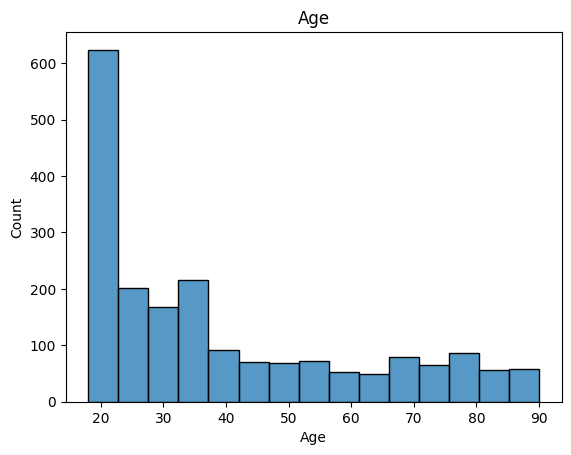

In [25]:
# Checking the Age columns using histplot
plt.title("Age")
sns.histplot(df,x="Age")
plt.show()

In [26]:
df["Gender"].value_counts()

Gender
Male      992
Female    966
Name: count, dtype: int64

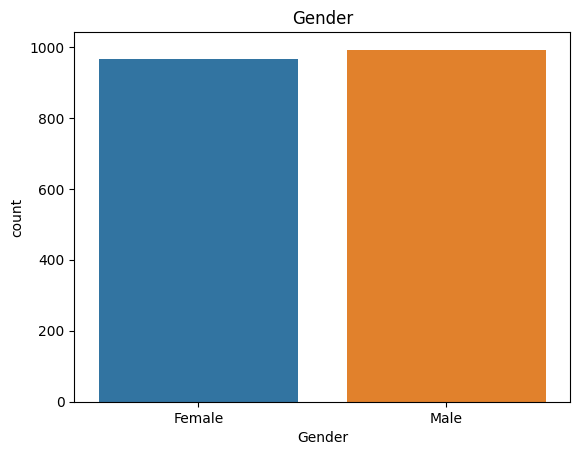

In [27]:
#Checking the Gender Column using countplot
plt.title("Gender")
sns.countplot(df,x="Gender",hue="Gender")
plt.show()

In [28]:
df["Hormonal Changes"].value_counts()

Hormonal Changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64

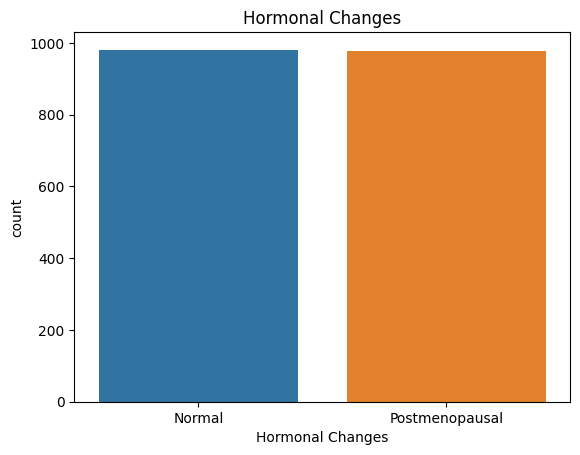

In [29]:
#Checking the Hormonal Changes using countplot
plt.title("Hormonal Changes")
sns.countplot(df,x="Hormonal Changes",hue="Hormonal Changes")
plt.show()

In [30]:
df["Osteoporosis"].value_counts()

Osteoporosis
1    979
0    979
Name: count, dtype: int64

####  value counts can be used to understand the distribution of classes in a classification problem. 1 for osteoporosis presences and 0 for osteroporosis is absent

In [31]:
pd.crosstab(columns=df["Hormonal Changes"],index=df["Osteoporosis"])

Hormonal Changes,Normal,Postmenopausal
Osteoporosis,,
0,498,481
1,483,496


####  the counts of each combination of values between the target and predicted variable.

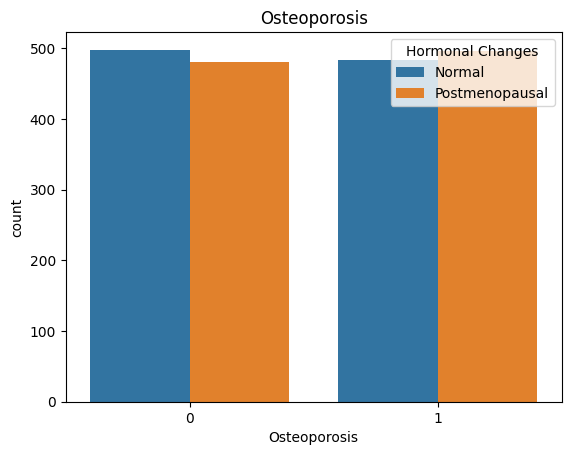

In [32]:
plt.title("Osteoporosis")
sns.countplot(df,x="Osteoporosis",hue="Hormonal Changes")
plt.show()

In [33]:
df["Family History"].value_counts()

Family History
No     998
Yes    960
Name: count, dtype: int64

In [34]:
pd.crosstab(columns=df["Family History"],index=df["Osteoporosis"])

Family History,No,Yes
Osteoporosis,,
0,498,481
1,500,479


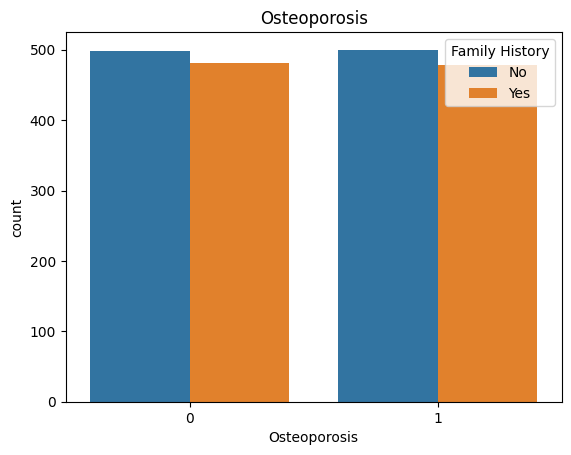

In [35]:

plt.title("Osteoporosis")
sns.countplot(df,x="Osteoporosis",hue="Family History")
plt.show()

In [36]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Medical Conditions,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Rheumatoid Arthritis,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,Hyperthyroidism,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Hyperthyroidism,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,Rheumatoid Arthritis,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,Rheumatoid Arthritis,Yes,1


In [37]:
df["Race/Ethnicity"].value_counts()

Race/Ethnicity
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64

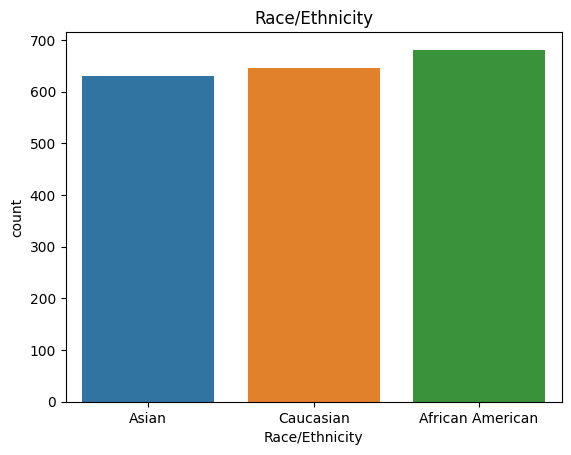

In [38]:
plt.title("Race/Ethnicity")
sns.countplot(df,x="Race/Ethnicity",hue="Race/Ethnicity")
plt.show()

In [39]:
pd.crosstab(columns=df["Race/Ethnicity"],index=df["Osteoporosis"])

Race/Ethnicity,African American,Asian,Caucasian
Osteoporosis,,,
0,337,317,325
1,344,314,321


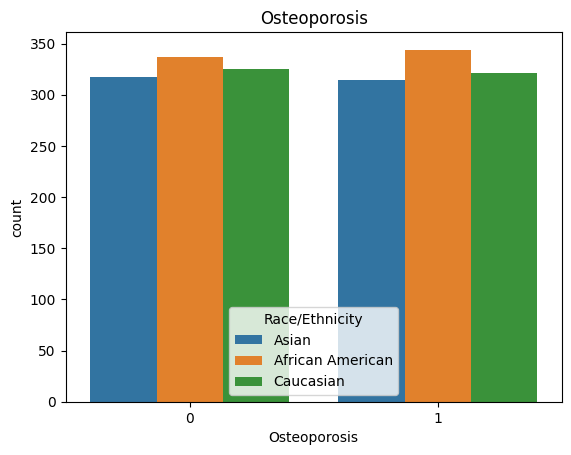

In [40]:
plt.title("Osteoporosis")
sns.countplot(df,x="Osteoporosis",hue="Race/Ethnicity")
plt.show()

In [41]:
df["Body Weight"].value_counts()

Body Weight
Normal         1027
Underweight     931
Name: count, dtype: int64

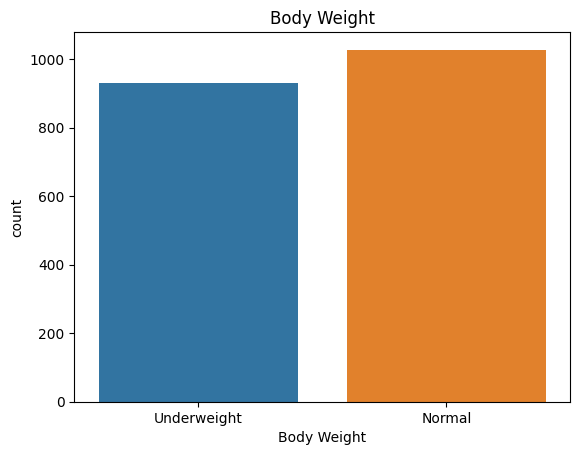

In [42]:
plt.title("Body Weight")
sns.countplot(df,x="Body Weight",hue="Body Weight")
plt.show()

In [43]:
df["Calcium Intake"].value_counts()

Calcium Intake
Low         1004
Adequate     954
Name: count, dtype: int64

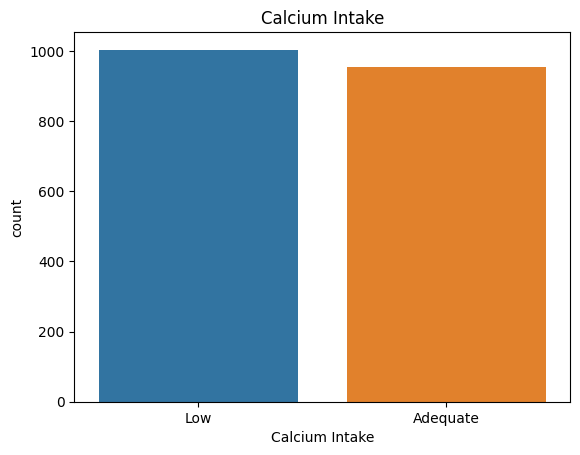

In [44]:
plt.title("Calcium Intake")
sns.countplot(df,x="Calcium Intake",hue="Calcium Intake")
plt.show()

In [45]:
pd.crosstab(columns=df["Calcium Intake"],index=df["Osteoporosis"])

Calcium Intake,Adequate,Low
Osteoporosis,,
0,475,504
1,479,500


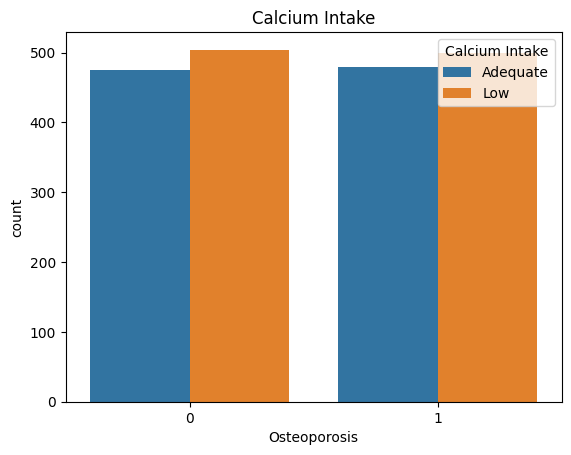

In [46]:
plt.title("Calcium Intake")
sns.countplot(df,x="Osteoporosis",hue="Calcium Intake")
plt.show()

In [47]:
df["Vitamin D Intake"].value_counts()

Vitamin D Intake
Sufficient      1011
Insufficient     947
Name: count, dtype: int64

In [48]:
df["Physical Activity"].value_counts()

Physical Activity
Active       1021
Sedentary     937
Name: count, dtype: int64

In [49]:
df["Smoking"].value_counts()

Smoking
Yes    982
No     976
Name: count, dtype: int64

In [50]:
df["Prior Fractures"].value_counts()

Prior Fractures
Yes    983
No     975
Name: count, dtype: int64

In [51]:
df.isnull().sum()

Age                   0
Gender                0
Hormonal Changes      0
Family History        0
Race/Ethnicity        0
Body Weight           0
Calcium Intake        0
Vitamin D Intake      0
Physical Activity     0
Smoking               0
Medical Conditions    0
Prior Fractures       0
Osteoporosis          0
dtype: int64

#### The get_dummies() function is used in machine learning for handling categorical variables.


In [52]:
pd.get_dummies(df["Gender"],dtype="int",drop_first=True)

,Male
0,0
1,0
2,0
3,0
4,1
...,...
1953,0
1954,0
1955,0
1956,1


In [53]:
df["gender"]=pd.get_dummies(df["Gender"],dtype="int",drop_first=True)

In [54]:
df.drop("Gender",axis=1,inplace=True)

In [55]:
df.head()

,Age,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Medical Conditions,Prior Fractures,Osteoporosis,gender
0,69,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Rheumatoid Arthritis,Yes,1,0
1,32,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,Hyperthyroidism,Yes,1,0
2,89,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Hyperthyroidism,No,1,0
3,78,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,Rheumatoid Arthritis,No,1,0
4,38,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,Rheumatoid Arthritis,Yes,1,1


In [56]:
pd.get_dummies(df["Hormonal Changes"],dtype="int",drop_first=True)

,Postmenopausal
0,0
1,0
2,1
3,0
4,1
...,...
1953,0
1954,1
1955,1
1956,1


In [57]:
df["hormonal changes"]=pd.get_dummies(df["Hormonal Changes"],dtype="int",drop_first=True)

In [58]:
df[["Hormonal Changes","hormonal changes"]]

,Hormonal Changes,hormonal changes
0,Normal,0
1,Normal,0
2,Postmenopausal,1
3,Normal,0
4,Postmenopausal,1
...,...,...
1953,Normal,0
1954,Postmenopausal,1
1955,Postmenopausal,1
1956,Postmenopausal,1


In [59]:
df.drop("Hormonal Changes",axis=1,inplace=True)

In [60]:
df.head()

,Age,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Medical Conditions,Prior Fractures,Osteoporosis,gender,hormonal changes
0,69,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Rheumatoid Arthritis,Yes,1,0,0
1,32,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,Hyperthyroidism,Yes,1,0,0
2,89,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Hyperthyroidism,No,1,0,1
3,78,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,Rheumatoid Arthritis,No,1,0,0
4,38,Yes,African American,Normal,Low,Sufficient,Active,Yes,Rheumatoid Arthritis,Yes,1,1,1


In [61]:
df["family history"]=pd.get_dummies(df["Family History"],dtype="int",drop_first=True)
df.drop("Family History",axis=1,inplace=True)

In [62]:
df["weight"]=pd.get_dummies(df["Body Weight"],dtype="int",drop_first=True)
df.drop("Body Weight",axis=1,inplace=True)

In [63]:
df["calcium intake"]=pd.get_dummies(df["Calcium Intake"],dtype="int",drop_first=True)
df.drop("Calcium Intake",axis=1,inplace=True)

In [64]:
df["vit D"]=pd.get_dummies(df["Vitamin D Intake"],dtype="int",drop_first=True)
df.drop("Vitamin D Intake",axis=1,inplace=True)

In [65]:
df["Activity"]=pd.get_dummies(df["Physical Activity"],dtype="int",drop_first=True)
df.drop("Physical Activity",axis=1,inplace=True)

In [66]:
df["smoking"]=pd.get_dummies(df["Smoking"],dtype="int",drop_first=True)
df.drop("Smoking",axis=1,inplace=True)

In [67]:
df.head()

,Age,Race/Ethnicity,Medical Conditions,Prior Fractures,Osteoporosis,gender,hormonal changes,family history,weight,calcium intake,vit D,Activity,smoking
0,69,Asian,Rheumatoid Arthritis,Yes,1,0,0,1,1,1,1,1,1
1,32,Asian,Hyperthyroidism,Yes,1,0,0,1,1,1,1,1,0
2,89,Caucasian,Hyperthyroidism,No,1,0,1,0,0,0,1,0,0
3,78,Caucasian,Rheumatoid Arthritis,No,1,0,0,0,1,0,0,1,1
4,38,African American,Rheumatoid Arthritis,Yes,1,1,1,1,0,1,1,0,1


In [68]:
df["Fractures"]=pd.get_dummies(df["Prior Fractures"],dtype="int",drop_first=True)
df.drop("Prior Fractures",axis=1,inplace=True)

In [69]:
df.dropna(subset=['Medical Conditions'], inplace=True)

In [70]:
df.head()

,Age,Race/Ethnicity,Medical Conditions,Osteoporosis,gender,hormonal changes,family history,weight,calcium intake,vit D,Activity,smoking,Fractures
0,69,Asian,Rheumatoid Arthritis,1,0,0,1,1,1,1,1,1,1
1,32,Asian,Hyperthyroidism,1,0,0,1,1,1,1,1,0,1
2,89,Caucasian,Hyperthyroidism,1,0,1,0,0,0,1,0,0,0
3,78,Caucasian,Rheumatoid Arthritis,1,0,0,0,1,0,0,1,1,0
4,38,African American,Rheumatoid Arthritis,1,1,1,1,0,1,1,0,1,1


In [71]:
df["medical condition"]=pd.get_dummies(df["Medical Conditions"],dtype="int",drop_first=True)
df.drop("Medical Conditions",axis=1,inplace=True)

In [72]:
df.head()

,Age,Race/Ethnicity,Osteoporosis,gender,hormonal changes,family history,weight,calcium intake,vit D,Activity,smoking,Fractures,medical condition
0,69,Asian,1,0,0,1,1,1,1,1,1,1,1
1,32,Asian,1,0,0,1,1,1,1,1,0,1,0
2,89,Caucasian,1,0,1,0,0,0,1,0,0,0,0
3,78,Caucasian,1,0,0,0,1,0,0,1,1,0,1
4,38,African American,1,1,1,1,0,1,1,0,1,1,1


In [73]:
df.isnull().sum()

Age                  0
Race/Ethnicity       0
Osteoporosis         0
gender               0
hormonal changes     0
family history       0
weight               0
calcium intake       0
vit D                0
Activity             0
smoking              0
Fractures            0
medical condition    0
dtype: int64

<Axes: >

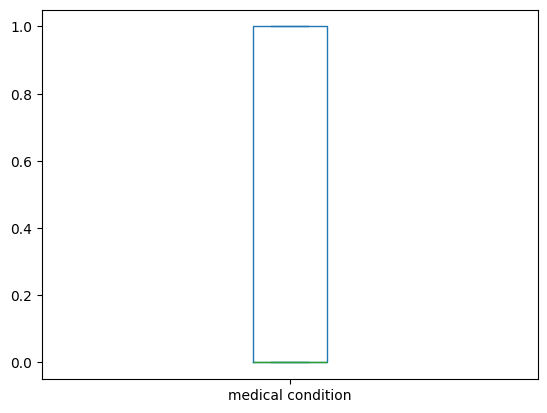

In [74]:
df["medical condition"].plot.box()

#### categorical variables need to be transformed into a numerical format.

In [75]:
#Import LabelEncoder
from sklearn.preprocessing import LabelEncoder


In [76]:
le=LabelEncoder()

In [77]:
le.fit_transform(df["Race/Ethnicity"])

array([1, 1, 2, ..., 0, 0, 0])

In [78]:
df["Race/Ethnicity"]=le.fit_transform(df["Race/Ethnicity"])

In [79]:
df.head()

,Age,Race/Ethnicity,Osteoporosis,gender,hormonal changes,family history,weight,calcium intake,vit D,Activity,smoking,Fractures,medical condition
0,69,1,1,0,0,1,1,1,1,1,1,1,1
1,32,1,1,0,0,1,1,1,1,1,0,1,0
2,89,2,1,0,1,0,0,0,1,0,0,0,0
3,78,2,1,0,0,0,1,0,0,1,1,0,1
4,38,0,1,1,1,1,0,1,1,0,1,1,1


In [80]:
df.isna().sum()

Age                  0
Race/Ethnicity       0
Osteoporosis         0
gender               0
hormonal changes     0
family history       0
weight               0
calcium intake       0
vit D                0
Activity             0
smoking              0
Fractures            0
medical condition    0
dtype: int64

#### Split the columns into Independant Variable(x) and Target Variable(y)

In [81]:
x=df.drop("Osteoporosis",axis=1)
y=df["Osteoporosis"]

#### Split Dataset into Train,Test

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=98)

#### Importing and Applying Model 

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
model=LogisticRegression()

In [85]:
model.fit(x_train,y_train)

LogisticRegression()

In [86]:
y_pred=model.predict(x_test)

#### Importing and Checking Accuracy Score classification_report,confusion_matrix 

In [87]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [88]:
accuracy_score(y_test,y_pred)

0.8448979591836735

#### The model achieves an overall accuracy of 84%, meaning that 84% of all instances in the dataset were correctly classified.

In [89]:
confusion_matrix(y_test,y_pred)

array([[205,  22],
       [ 54, 209]], dtype=int64)

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       227
           1       0.90      0.79      0.85       263

    accuracy                           0.84       490
   macro avg       0.85      0.85      0.84       490
weighted avg       0.85      0.84      0.84       490




#### For class 0, which likely represents one category or class in your dataset, the precision is 79%, recall is 90%, and F1-score is 84%.
#### For class 1, which likely represents another category or class in your dataset, the precision is 90%, recall is 79%, and F1-score is 85%.

In [91]:
model.score(x_train,y_train)

0.8160762942779292

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
lr=LinearRegression()

In [94]:
lr.fit(x_train,y_train)

LinearRegression()

In [95]:
y_pred=lr.predict(x_test)

In [96]:
r2_score(y_test,y_pred)

0.4654243545588671

In [97]:
mean_squared_error(y_test,y_pred)

0.1329225348124993